# Exploratory Data Analysis with the National Immunization Survey

Vaccinations are important for the health of both individuals and society as a whole. A number of factors play into when children are immunized against a variety of diseases: doctor recommendations, limitations set by insurance companies, and in some cases, parental preferences and scheduling logistics.

How do these factors play into when children are vaccinated? And how does the scheduling of a vaccine recommended to take place at a certain age (like the Measles, Mumps, Rubella (MMR) vaccine) compare to when children receive vaccines for seasonal diseases like the flu?

Let's find out!

## 1. The National Immunization Survey

The National Immunuzation Survey is conducted anually by the US Center for Disease Control, and both the raw data and reports are published [on their website](https://www.cdc.gov/vaccines/imz-managers/nis/datasets.html). Here is a taste of what the dataset looks like.

Import the 2016 National Immunization Survey from `nis_immunization_2016.csv` and view the first few records.

- Import `pandas` as `pd` and `matplotlib.pyplot` as `plt`.
- Use the pandas function `read_csv()` to read `nis_immunization_2016.csv` from the folder `datasets` into a pandas dataframe called `vac`.
- Use `print()` and `head()` to show the first few rows of the dataframe.

<hr>

## Good to know

You can find (and print out -- maybe even laminate!) a helpful [pandas cheatsheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) to remind yourself of some of the basic commands and workflows we'll be exploring here.

Also, this project builds on skills and terms introduced in [Intro to Python for Data Science](https://www.datacamp.com/courses/intro-to-python-for-data-science) and [Intermediate Python for Data Science](https://www.datacamp.com/courses/intermediate-python-for-data-science). Feel free to review the slides and exercises as you go through this project.

The `import ____ as ____` snytax will allow you to import functions and libraries with custom (usually shorter) names like `pd` and `plt`.

When calling a `pandas` function, be sure to include both the library and function in your code, and the filename in quotes (single or double will do):

```
vac = pd.read_csv('datasets/filename.csv')
```

Remember the syntax difference between functions (like `print()`) and methods (like `head()`). To print the head of a dataframe `df`, use:

```
print(df.head())
```

In [3]:
# import pandas as pd and matplotlib.pyplot as plt
....

# read nis_immunization_2016.csv from the folder datasets, into a pandas dataframe: vac
vac = ....

# print the first 5 records of vac with head()
....

SyntaxError: invalid syntax (<ipython-input-3-e38911c59411>, line 2)

In [4]:
# import pandas as pd and matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

# read nis_immunization_2016.csv from the folder datasets, into a pandas dataframe: vac
vac = pd.read_csv('datasets/nis_immunization_2016.csv')

# print the first 5 records of vac with head()
print(vac.head())

c:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (15,377,386,387,395,396,404,405,410,422,423,431,438,439,446) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


   SEQNUMC  SEQNUMHH                                               PDAT  \
0      NaN       NaN         CHILD DOES NOT HAVE ADEQUATE PROVIDER DATA   
1      NaN       NaN  CHILD HAS ADEQUATE PROVIDER DATA OR ZERO VACCI...   
2      NaN       NaN         CHILD DOES NOT HAVE ADEQUATE PROVIDER DATA   
3      NaN       NaN         CHILD DOES NOT HAVE ADEQUATE PROVIDER DATA   
4      NaN       NaN  CHILD HAS ADEQUATE PROVIDER DATA OR ZERO VACCI...   

      PROVWT_D  PROVWT_D_TERR     RDDWT_D  RDDWT_D_TERR  STRATUM  YEAR  \
0          NaN            NaN  221.539298    221.539298     1060  2016   
1  1146.680080    1146.680080  415.401889    415.401889     1014  2016   
2          NaN            NaN  150.564728    150.564728     1057  2016   
3          NaN            NaN   41.015888     41.015888     1013  2016   
4   127.904605     127.904605   71.701052     71.701052     1073  2016   

  AGECPOXR                        ...                         XVRCTY2 XVRCTY3  \
0      NaN             

In [14]:
%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

1/1 tests passed


## 2. The data dictionary

455 columns!!! Wow! Good thing the dataset comes with a dictionary. 

Let's load the data dictionary and take a look. This tells us what each column label means, the kind of data stored there, and the number of missing values.

The task instructions start with a brief sentence framing the task.

- The specific task instructions go in a bullet point list.
- One bullet per sub task.
- At most 4 bullets.

<hr>

Give more info, context, and links to external documentation under the horizontal ruler. The instructions should at most have 800 characters.

This is a hint the student will get if they click the hint button at the bottom of the instructions. It's the last help the student can get, so make it helpful. 

```
# Feel free to include links to documentation.
print("And code snippets in the hint.")
```

In [15]:
# load in the data dictionary from nis_immunization_dictionary.csv: vac_dic
vac_dic = pd.read_csv('datasets/nis_immunization_dictionary.csv')

# print the first 5 records of vac_dic
print(vac_dic.head())

In [7]:
# load in the data dictionary from nis_immunization_dictionary.csv: vac_dic
vac_dic = pd.read_csv('datasets/nis_immunization_dictionary.csv')

# print the first 5 records of vac_dic
print(vac_dic.head())

                                              Labels  Levels    Class  \
0                                                NaN       1      NaN   
1                                                NaN       1      NaN   
2                                                NaN       2      NaN   
3  FINAL DUAL-FRAME PROVIDER-PHASE WEIGHT (EXCLUD...       0  numeric   
4  FINAL DUAL-FRAME PROVIDER-PHASE WEIGHT INCLUDI...       0  numeric   

   Storage    NAs  
0  integer  28296  
1  integer  28296  
2  integer      0  
3   double  13308  
4   double  13012  


In [17]:
%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

1/1 tests passed


## 3. First MMR Vaccines

There's obviously a lot here worthy of analysis, but let's focus in on two things: a child's first flu vaccine and a child's first MMR vaccine. Let's look at MMR vaccines. 

The task instructions start with a brief sentence framing the task.

- The specific task instructions go in a bullet point list.
- One bullet per sub task.
- At most 4 bullets.

<hr>

Give more info, context, and links to external documentation under the horizontal ruler. The instructions should at most have 800 characters.

This is a hint the student will get if they click the hint button at the bottom of the instructions. It's the last help the student can get, so make it helpful. 

```
# Feel free to include links to documentation.
print("And code snippets in the hint.")
```

In [18]:
# import median from statistics
from statistics import median

# make a list from the `DMMR1` column of vac and remove null values: mmr
mmr = list(vac[vac['DMMR1'].notnull()]['DMMR1'])

# earliest vaccine reported
print('The youngest child to receive their first MMR vaccine was ' + str(min(mmr)) + ' days old.')
print('The oldest child to receive their first MMR vaccine ' + str(max(mmr)) + ' days old.')
print('The typical age at which a child received their first MMR vaccine was ' + str(median(mmr)) + ' days old.')

In [8]:
# import median from statistics
from statistics import median

# make a list from the `DMMR1` column of vac and remove null values: mmr
mmr = list(vac[vac['DMMR1'].notnull()]['DMMR1'])

# earliest vaccine reported
print('The youngest child to receive their first MMR vaccine was ' + str(min(mmr)) + ' days old.')
print('The oldest child to receive their first MMR vaccine ' + str(max(mmr)) + ' days old.')
print('The typical age at which a child received their first MMR vaccine was ' + str(median(mmr)) + ' days old.')

The youngest child to receive their first MMR vaccine was 62.0 days old.
The oldest child to receive their first MMR vaccine 1155.0 days old.
The typical age at which a child received their first MMR vaccine was 378.0 days old.


In [20]:
%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

1/1 tests passed


## 4. Visualizing first MMR vaccines

It seems children tend to receive MMR vaccines around, or just after, their first birthday (365 or 266 days old). These summary statistics are helpful, but there's a wide range between the youngest and oldest recipients of that first MMR vaccine. Let's visualize these vaccination ages to see how those first vaccinations are distributed.

The task instructions start with a brief sentence framing the task.

- The specific task instructions go in a bullet point list.
- One bullet per sub task.
- At most 4 bullets.

<hr>

Give more info, context, and links to external documentation under the horizontal ruler. The instructions should at most have 800 characters.

This is a hint the student will get if they click the hint button at the bottom of the instructions. It's the last help the student can get, so make it helpful. 

```
# Feel free to include links to documentation.
print("And code snippets in the hint.")
```

In [21]:
# use plt.hist() to display vaccination age distribution, using all default options
plt.hist(mmr)
plt.xlabel('Age of child (in days) upon receiving first MMR vaccine')
plt.ylabel('Number of children')
plt.title('Age of children receiving their first MMR immunization')
plt.show()

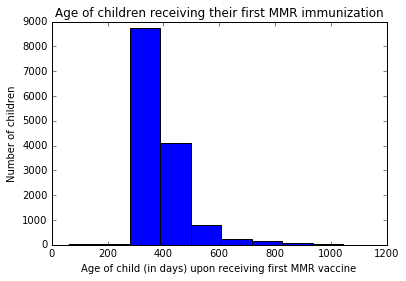

In [9]:
# use plt.hist() to display vaccination age distribution, using all default options
plt.hist(mmr)
plt.xlabel('Age of child (in days) upon receiving first MMR vaccine')
plt.ylabel('Number of children')
plt.title('Age of children receiving their first MMR immunization')
plt.show()

In [23]:
%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

1/1 tests passed


## 5. Looking closely

It seems from that histogram that most of the MMR vaccines were around the first or second birthday, and then there is a long tail effect after that. Let's zoom in on the time between first and second birthdays.

Now we see multiple spikes in the histogram, previously smoothed over. These roughly correspond to first birthday and 15 months, with a small bump at 18 months. These are dates that doctors recommend children have checkups.

Notice also that there is a sharp spike up, and then trail off -- a kind of half vell curve. It seems that parents tend to schedule these checkups on or _after_ the corresponding age (12, 15, or 18 months), rather than before. While we might think this is due to the understandable procrastination of young parents, many vaccines prescribe minimum ages (e.g., 12 months _or older_). As a result, doctors sometimes recommend (and insurance companies sometimes require) checkups with vaccinations coming on or after the child's birthday. And, of course, since these vaccinations are important to the child's health, the earlier the better. Hence the half bell curve.

The task instructions start with a brief sentence framing the task.

- The specific task instructions go in a bullet point list.
- One bullet per sub task.
- At most 4 bullets.

<hr>

Give more info, context, and links to external documentation under the horizontal ruler. The instructions should at most have 800 characters.

This is a hint the student will get if they click the hint button at the bottom of the instructions. It's the last help the student can get, so make it helpful. 

```
# Feel free to include links to documentation.
print("And code snippets in the hint.")
```

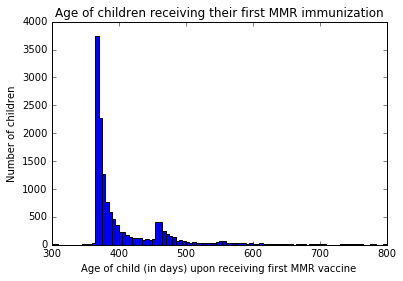

In [10]:
# focus the histogram to 300-800 days old, and use 100 bins (each bin represents 5 days)
plt.hist(mmr, range = (300,800), bins=100)
plt.xlabel('Age of child (in days) upon receiving first MMR vaccine')
plt.ylabel('Number of children')
plt.title('Age of children receiving their first MMR immunization')
plt.show()

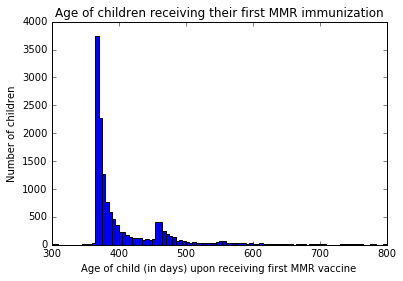

In [11]:
# focus the histogram to 300-800 days old, and use 100 bins (each bin represents 5 days)
plt.hist(mmr, range = (300,800), bins=100)
plt.xlabel('Age of child (in days) upon receiving first MMR vaccine')
plt.ylabel('Number of children')
plt.title('Age of children receiving their first MMR immunization')
plt.show()

In [26]:
%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

1/1 tests passed


## 6. First flu vaccine

Let's compare to flu vaccines. Since flu season is tied to a time of year, rather than a person's age, we might expect a different kind of distribution. On the other hand, since infants tend to get their flu vaccines from their pediatrician, we might expect an effect from checkup schedules like we saw with MMR vaccines.

But let's start with the summary statistics.

The task instructions start with a brief sentence framing the task.

- The specific task instructions go in a bullet point list.
- One bullet per sub task.
- At most 4 bullets.

<hr>

Give more info, context, and links to external documentation under the horizontal ruler. The instructions should at most have 800 characters.

This is a hint the student will get if they click the hint button at the bottom of the instructions. It's the last help the student can get, so make it helpful. 

```
# Feel free to include links to documentation.
print("And code snippets in the hint.")
```

In [27]:
# make a list from the `DFLU1` column of vac and remove null values: flu
flu = list(vac[vac['DFLU1'].notnull()]['DFLU1'])

# earliest vaccine reported
print('The youngest child to receive their first flu vaccine was ' + str(min(flu)) + ' days old.')
print('The oldest child to receive their first flu vaccine ' + str(max(flu)) + ' days old.')
print('The typical age at which a child received their first flu vaccine was ' + str(median(flu)) + ' days old.')

In [12]:
# make a list from the `DFLU1` column of vac and remove null values: flu
flu = list(vac[vac['DFLU1'].notnull()]['DFLU1'])

# earliest vaccine reported
print('The youngest child to receive their first flu vaccine was ' + str(min(flu)) + ' days old.')
print('The oldest child to receive their first flu vaccine ' + str(max(flu)) + ' days old.')
print('The typical age at which a child received their first flu vaccine was ' + str(median(flu)) + ' days old.')

The youngest child to receive their first flu vaccine was 0.0 days old.
The oldest child to receive their first flu vaccine 1257.0 days old.
The typical age at which a child received their first flu vaccine was 279.0 days old.


In [29]:
%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

1/1 tests passed


## 7. Visualizing children's first flu vaccines

That definitely looks different than the MMR, as the median age for the first flu vaccine comes before the first birthday. Of course, this is the time of life in which infants have very frequent visits to the pediatrician, so we can't rule out a checkup-scheduling effect. Let's visualize the data and see what we find.

The task instructions start with a brief sentence framing the task.

- The specific task instructions go in a bullet point list.
- One bullet per sub task.
- At most 4 bullets.

<hr>

Give more info, context, and links to external documentation under the horizontal ruler. The instructions should at most have 800 characters.

This is a hint the student will get if they click the hint button at the bottom of the instructions. It's the last help the student can get, so make it helpful. 

```
# Feel free to include links to documentation.
print("And code snippets in the hint.")
```

In [30]:
# use plt.hist() to display flu vaccination age distribution, 0-800 days old, with 160 bins
plt.hist(flu, range = (0,800), bins=160)
plt.xlabel('Age of child (in days) upon receiving first flu vaccine')
plt.ylabel('Number of children')
plt.title('Age of children receiving their first flu immunization')
plt.show()

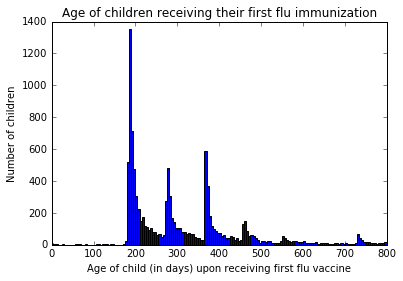

In [13]:
# use plt.hist() to display flu vaccination age distribution, 0-800 days old, with 160 bins
plt.hist(flu, range = (0,800), bins=160)
plt.xlabel('Age of child (in days) upon receiving first flu vaccine')
plt.ylabel('Number of children')
plt.title('Age of children receiving their first flu immunization')
plt.show()

In [32]:
%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

1/1 tests passed


## 8. Visualizing the first _three_ flu vaccines

Judging by the shape of the previous histogram, it looks like the first flu shot tends to be administered at a regular checkup, mainly 6, 9, or 12 months. Hardly any were administered before 6 months, which is [the CDC's recommended minimum age](https://www.cdc.gov/flu/protect/children.htm) for a flu vaccine.

The flu shot is administered far more frequently than the MMR, though. In fact, most infants are recommended to receive _two_ doses of the flu shot during their first flu season. The National Immunization Survey includes dates for (up to) the first nine flu immunizations, so let's look a little closer at some of these other vaccinations. This next histogram shows the ages at which children received any of their first three (reported) flu shots.

This is fascinating! The half bell curve is still pronounced for many of the regular checkups (6, 9, 12, 15, and 18 months), but there is also a more rounded peak about a month after each one of those checkup dates, especially between 6 and 18 months old. The CDC recommends that for children receiving two flu shots in a single season (typical for the first season receiving a flu shot), there should be at least 28 days between doses, explaning the second peak. Since 6 months is the minimum age for the flu vaccine, and a child's first flu season in which they are eligible for the vaccine will come between 6 and 18 months old, this is the time period during which the double-peak is most pronounced.

But why is the second peak more rounded than the first? The first peak is a half bell curve likely because of minimum recommended (or required) ages for vaccines administered at those checkups. But the second peak of each pair is only for a flu shot. There is no birthday/milestone associated with the date, and parents might feel less urgency about having the _second_ dose at the first safe date than they do about vaccines their child is receiving for the first time. Regardless, we can see that the first flu shot dates exhibit both a seasonal effect _and_ some of the same checkup-oriented scheduling effects as the MMR, like the half bell curve. However, the _second_ flu shot tends to follow a more normal distribution of ages, despite tending to follow a regular checkup by about a month.

The task instructions start with a brief sentence framing the task.

- The specific task instructions go in a bullet point list.
- One bullet per sub task.
- At most 4 bullets.

<hr>

Give more info, context, and links to external documentation under the horizontal ruler. The instructions should at most have 800 characters.

This is a hint the student will get if they click the hint button at the bottom of the instructions. It's the last help the student can get, so make it helpful. 

```
# Feel free to include links to documentation.
print("And code snippets in the hint.")
```

In [33]:
# create list containing all non-null ages in `DFLU1`, `DFLU2`, and `DFLU3`: flu_shots
flu_shots = list(vac[vac['DFLU1'].notnull()]['DFLU1']) + list(vac[vac['DFLU2'].notnull()]['DFLU2']) + list(vac[vac['DFLU2'].notnull()]['DFLU2'])

# use plt.hist() to display flu vaccination age distribution, 0-800 days old, with 160 bins
plt.hist(flu_shots, range = (0,800), bins=160)
plt.xlabel('Age of child (in days) upon receiving flu vaccine')
plt.ylabel('Number of children')
plt.title('Age of children receiving their first three flu immunizations')
plt.show()

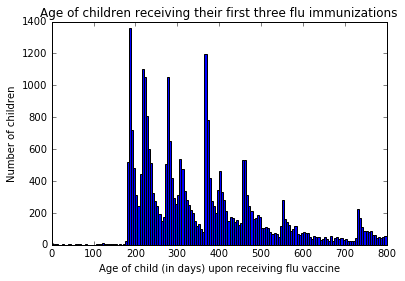

In [14]:
# create list containing all non-null ages in `DFLU1`, `DFLU2`, and `DFLU3`: flu_shots
flu_shots = list(vac[vac['DFLU1'].notnull()]['DFLU1']) + list(vac[vac['DFLU2'].notnull()]['DFLU2']) + list(vac[vac['DFLU2'].notnull()]['DFLU2'])

# use plt.hist() to display flu vaccination age distribution, 0-800 days old, with 160 bins
plt.hist(flu_shots, range = (0,800), bins=160)
plt.xlabel('Age of child (in days) upon receiving flu vaccine')
plt.ylabel('Number of children')
plt.title('Age of children receiving their first three flu immunizations')
plt.show()

In [35]:
%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

1/1 tests passed


## 9. Bringing it all together

Since both of these vaccines are tied to regular doctor visits in some way, let's plot the first MMR and the first flu shot together and see what kind of large-scale relationship we can find.

In [ ]:
# subset vac to only the `DFLU1` and `DMMR1` columns: flu_vs_mmr
flu_vs_mmr = vac[['DFLU1', 'DMMR1']]

# use dropna() to remove any row containing one or more null values from flu_vs_mmr
flu_vs_mmr = flu_vs_mmr.dropna()

# use plt.scatter() to plot the age of the first MMR vaccine (X) against the first flu vaccine (Y)
plt.scatter(flu_vs_mmr['DMMR1'], flu_vs_mmr['DFLU1'])
plt.xlabel('Age of child (in days) upon receiving first MMR vaccine')
plt.ylabel('Age of child (in days) upon receiving first flu vaccine')
plt.title('MMR and flu vaccination dates compared')
plt.show()

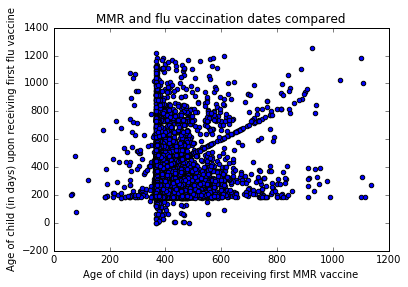

In [15]:
# subset vac to only the `DFLU1` and `DMMR1` columns: flu_vs_mmr
flu_vs_mmr = vac[['DFLU1', 'DMMR1']]

# use dropna() to remove any row containing one or more null values from flu_vs_mmr
flu_vs_mmr = flu_vs_mmr.dropna()

# use plt.scatter() to plot the age of the first MMR vaccine (X) against the first flu vaccine (Y)
plt.scatter(flu_vs_mmr['DMMR1'], flu_vs_mmr['DFLU1'])
plt.xlabel('Age of child (in days) upon receiving first MMR vaccine')
plt.ylabel('Age of child (in days) upon receiving first flu vaccine')
plt.title('MMR and flu vaccination dates compared')
plt.show()

## 10. Conclusion

I don't know about you, but this isn't what I expected to see! I expected to see more of a linear relationship -- perhaps multiple lines with a `y = x` slope, but different intercepts (corresponding to the scheduled checkup closest to the start of the child's first flu season). Instead, we see a lot of blobs with a rough L shape, taller than they are wide. What does this mean?

The vertical line component of each L corresponds to children getting their first MMR at the same age, but their first flu shot on different dates. More pronounced lines correspond to more children getting their MMR at the same age, and expectedly overlap with the spikes we saw in the histogram analysis above. 

The horizontal lines represent children getting their first flu shot at the same age, but not their MMR. Since the MMR is more tied to age and the flu to season, it makes sense that these lines would be shorter than the vertical lines. The fact that they point to the right, rather than straddle the vertical lines, corresponds to the half bell curve seen in the histograms. As noted above, parents bring children in for checkups _on or after_ certain ages, rather than before. And since infants' MMR shots tend to be done at one of these checkups, it makes sense that we would see this trend here as well.

Finally, there _is_ a line in this plot, exactly on the `y = x` slope. What do you think it represents?

In [ ]:
# choose the index number corresponding to the best interpretation
interpretation = ['children who only received one vaccine.', 
                  'children who received both vaccines exactly on their birthday.', 
                  'children who received their first MMR and their first flu shot on the same day.']

print('The `y = x` line on the scatter plot corresponds to ' + interpretation[2])

In [16]:
# choose the index number corresponding to the best interpretation
interpretation = ['children who only received one vaccine.', 
                  'children who received both vaccines exactly on their birthday.', 
                  'children who received their first MMR and their first flu shot on the same day.']

print('The `y = x` line on the scatter plot corresponds to ' + interpretation[2])

The `y = x` line on the scatter plot corresponds to children who received their first MMR and their first flu shot on the same day.
